In [40]:
import os
import keras
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model, Sequential
from keras import Input, Model
from keras.layers import Lambda, LSTM, RepeatVector, Dense, TimeDistributed, Bidirectional
import tensorflow as tf
import keras.backend as K
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [41]:
run_folder = 'logs/2018-02-23_17-36-49'
balances_filepath = "../../berka_dataset/parsed/balances.npy"

In [42]:
def get_balances(balances_filepath, timesteps=100, rescale=True):
    def split_balances(balances, timesteps):
        if balances.shape[1] < timesteps:
            return None
        elif balances.shape[1] == timesteps:
            return balances
        else:
            splitted_balances, remaining_balances = np.hsplit(balances, [timesteps])
            remaining_balances = split_balances(remaining_balances, timesteps)
            if remaining_balances is not None:
                return np.vstack([splitted_balances, remaining_balances])
            return splitted_balances

    balances = np.load(balances_filepath)
    if rescale:
        balances = MinMaxScaler(feature_range=(-1, 1)).fit_transform(balances)
    balances = split_balances(balances, timesteps)
    return balances

In [43]:
balances = get_balances(balances_filepath)

encoder = load_model(os.path.join(run_folder, 'encoder.h5'))
autoencoder = load_model(os.path.join(run_folder, 'autoencoder.h5'))

decoder_inputs = Input(shape=(10,))

decoder = autoencoder.get_layer(index=-4)(decoder_inputs)
decoder = autoencoder.get_layer(index=-3)(decoder)
decoder = autoencoder.get_layer(index=-2)(decoder)
decoder = autoencoder.get_layer(index=-1)(decoder)
decoder = Model(decoder_inputs, decoder)

print(autoencoder.summary())
print(decoder.summary())

/home/ubuntu/.local/lib/python3.5/site-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 100)               0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 100, 1)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 512)               528384    
_________________________________________________________________
embedding (Dense)            (None, 10)                5130      
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 100, 10)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 100, 512)          546816    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 100, 1)            513       
__________

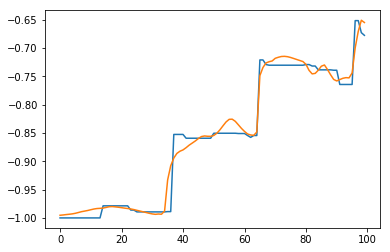

In [44]:
plt.plot(balances[50])
encoding_1 = encoder.predict(balances[50:51])
plt.plot(decoder.predict(encoding_1).T)

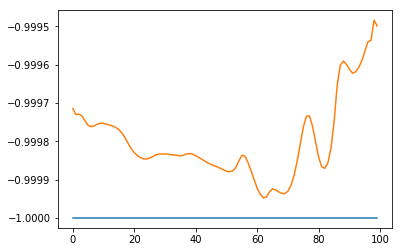

In [46]:
plt.plot(balances[300])
encoding_2 = encoder.predict(balances[1001:1002])
plt.plot(decoder.predict(encoding_2).T)

In [10]:
print(encoding_1 - encoding_2)

[[-0.12453413 -0.2246185  -0.5095274   0.2048307   0.25098908 -0.39780247
   0.18015534 -0.07430556 -0.15008005  0.23885578]]


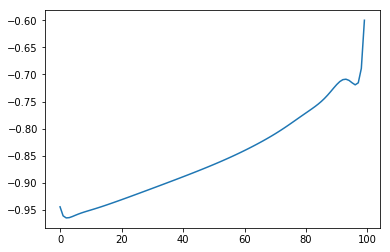